## Importing all the libraries

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

## Reading the file

还是蘑菇数据集，直接采用Kaggle竞赛中22维特征
https://www.kaggle.com/uciml/mushroom-classification

In [2]:
# path to where the data lies
dpath = '/Users/qing/desktop/XGBoost/data/'
data = pd.read_csv(dpath+"../data/mushrooms.csv")
data.head(6)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


### Let us check if there is any null values

很幸运，该数据没有空值／缺失数据

In [3]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### check if we have two claasification. Either the mushroom is poisonous or edibl

In [4]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [6]:
print data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


### check if 22 features(1st one is label) and 8124 instances

In [5]:
data.shape

(8124, 23)

### The dataset has values in strings.We need to convert all the unique values to integers. Thus we perform label encoding on the data

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
 
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Separating features and label

In [7]:
X = data.iloc[:,1:23]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only
X.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

### Splitting the data into training and testing dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

## default Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
model_LR= LogisticRegression()

In [11]:
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test, y_pred)

1.0

accuracy 

In [13]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.95547337278106514

## Logistic Regression(Tuned model)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

### CV

In [16]:
from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(LR_model, tuned_parameters,cv=10)

In [17]:
LR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [18]:
print(LR.best_params_)

{'penalty': 'l1', 'C': 1000}


In [19]:
y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test, y_pred)

1.0

In [20]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.97396449704142019

## Default Decision Tree model

In [21]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

In [22]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [23]:
y_prob = model_tree.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_tree.score(X_test, y_pred)

1.0

In [24]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

## Let us tune the hyperparameters of the Decision tree model

In [48]:
from sklearn.tree import DecisionTreeClassifier

model_DD = DecisionTreeClassifier()


tuned_parameters= { 'max_features': ["auto","sqrt","log2"],
                  'min_samples_leaf': range(1,100,1) , 'max_depth': range(1,50,1)
                  }
#tuned_parameters= { 'max_features': ["auto","sqrt","log2"]  }


#If “auto”, then max_features=sqrt(n_features).

In [49]:
from sklearn.model_selection import GridSearchCV
DD = GridSearchCV(model_DD, tuned_parameters,cv=10)

In [ ]:
DD.fit(X_train, y_train)

In [45]:
print(DD.grid_scores_)

[mean: 1.00000, std: 0.00000, params: {'max_features': 'auto'}, mean: 1.00000, std: 0.00000, params: {'max_features': 'sqrt'}, mean: 1.00000, std: 0.00000, params: {'max_features': 'log2'}]


/Applications/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [46]:
print(DD.best_score_)

1.0


In [47]:
print(DD.best_params_)

{'max_features': 'auto'}


In [ ]:
y_prob = DD.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
DD.score(X_test, y_pred)

In [ ]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

## Default Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

In [33]:
model_RR.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [34]:
y_prob = model_RR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_RR.score(X_test, y_pred)

1.0

In [35]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

## Let us tuned the parameters of Random Forest just for the purpose of knowledge
1) max_features 2) n_estimators 3) min_sample_leaf

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }

In [ ]:
from sklearn.model_selection import GridSearchCV
RR = GridSearchCV(model_RR, tuned_parameters,cv=10)

In [ ]:
RR.fit(X_train,y_train)

In [ ]:
print(RR.grid_scores_)

In [ ]:
print(RR.best_score_)

In [ ]:
print(RR.best_params_)

In [ ]:
y_prob = RR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
RR_model.score(X_test, y_pred)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

## Default XGBoost

In [4]:
from xgboost import XGBClassifier
model_XGB=XGBClassifier()

In [9]:
model_XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [10]:
y_prob = model_XGB.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_XGB.score(X_test, y_pred)

1.0

In [14]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

### 特征重要性
在XGBoost中特征重要性已经自动算好，存放在feature_importances_

In [15]:
  print(model_XGB.feature_importances_)

[ 0.0042735   0.0042735   0.01282051  0.0042735   0.36965811  0.
  0.05128205  0.04700855  0.04273504  0.01282051  0.03205128  0.04273504
  0.04273504  0.01282051  0.01923077  0.          0.          0.02991453
  0.          0.15170941  0.08333334  0.03632479]


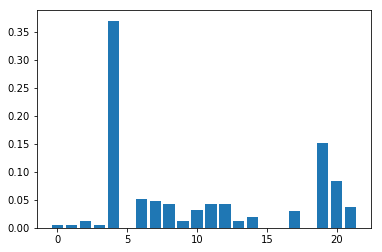

In [17]:
# plot
from matplotlib import pyplot
pyplot.bar(range(len(model_XGB.feature_importances_)), model_XGB.feature_importances_)
pyplot.show()

上述表是按特征顺序打印，还可以使用XGBoost内嵌的函数，按特征重要性排序

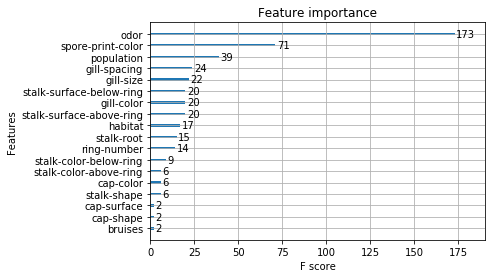

In [19]:
# plot feature importance using built-in function
from xgboost import plot_importance
plot_importance(model_XGB)
pyplot.show()

可以根据特征重要性进行特征选择

In [22]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# Fit model using each importance as a threshold
thresholds = sort(model_XGB.feature_importances_)
for thresh in thresholds:
  # select features using threshold
  selection = SelectFromModel(model_XGB, threshold=thresh, prefit=True)
  select_X_train = selection.transform(X_train)
  # train model
  selection_model = XGBClassifier()
  selection_model.fit(select_X_train, y_train)
# eval model
  select_X_test = selection.transform(X_test)
  y_pred = selection_model.predict(select_X_test)
  predictions = [round(value) for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)
  print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1],
      accuracy*100.0))

Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.004, n=18, Accuracy: 100.00%
Thresh=0.004, n=18, Accuracy: 100.00%
Thresh=0.004, n=18, Accuracy: 100.00%
Thresh=0.013, n=15, Accuracy: 100.00%
Thresh=0.013, n=15, Accuracy: 100.00%
Thresh=0.013, n=15, Accuracy: 100.00%
Thresh=0.019, n=12, Accuracy: 100.00%
Thresh=0.030, n=11, Accuracy: 100.00%
Thresh=0.032, n=10, Accuracy: 100.00%
Thresh=0.036, n=9, Accuracy: 100.00%
Thresh=0.043, n=8, Accuracy: 100.00%
Thresh=0.043, n=8, Accuracy: 100.00%
Thresh=0.043, n=8, Accuracy: 100.00%
Thresh=0.047, n=5, Accuracy: 100.00%
Thresh=0.051, n=4, Accuracy: 99.51%
Thresh=0.083, n=3, Accuracy: 99.45%
Thresh=0.152, n=2, Accuracy: 99.45%
Thresh=0.370, n=1, Accuracy: 98.58%
